In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from camb import model
from scipy.interpolate import interp1d
import os 

%matplotlib inline

In [25]:
# Reading Pinocchio cosmology file: scale factor and linear growth rate
pinocchio_cosmology        = np.loadtxt('pinocchio.LCDM_READ_PK_TABLE_and_SCALE_DEP.cosmology.out', unpack=True)
scale_factor               = pinocchio_cosmology[0] 
linear_growth_rate_square  = pinocchio_cosmology[6]**2

# Convert scale factor to redshift
z = (1/scale_factor) - 1

# Create an interpolator 
interpolator_growth_z_square = interp1d(z, linear_growth_rate_square, kind='linear', fill_value='extrapolate')

# Read z of CAMB Pk and extrapolate growth at CAMB z
camb_z           = np.loadtxt('/u/mlepinzan/PINOCCHIO/PINOCCHIO_testing_phase/READ_PK_TABLE_and_SCALE_DEP/CAMB_redshifts/redshifts_file.txt', unpack=True)[1]
growht_at_camb_z = interpolator_growth_z_square(camb_z)

# READ CAMB at z = 0
camb_k_0, camb_pk_0 = np.loadtxt('/u/mlepinzan/PINOCCHIO/PINOCCHIO_testing_phase/READ_PK_TABLE_and_SCALE_DEP/CAMB_PK_Tables_and_Transfer_function/camb_pk_149.dat', unpack=True)

# Create dir for storing rescaled Pk
if not os.path.exists('Custom_scale_dep'):
    os.makedirs('Custom_scale_dep')

# Calculate scale dep PK, at every z, using the calculated growth_at_camb_z
for i in range(len(growht_at_camb_z)):
    file_name          = f'Custom_scale_dep/custom_pk_{str(i).zfill(3)}.dat'
    np.savetxt(file_name, np.column_stack((camb_k_0 , camb_pk_0*growht_at_camb_z[i])), delimiter=' ')
  


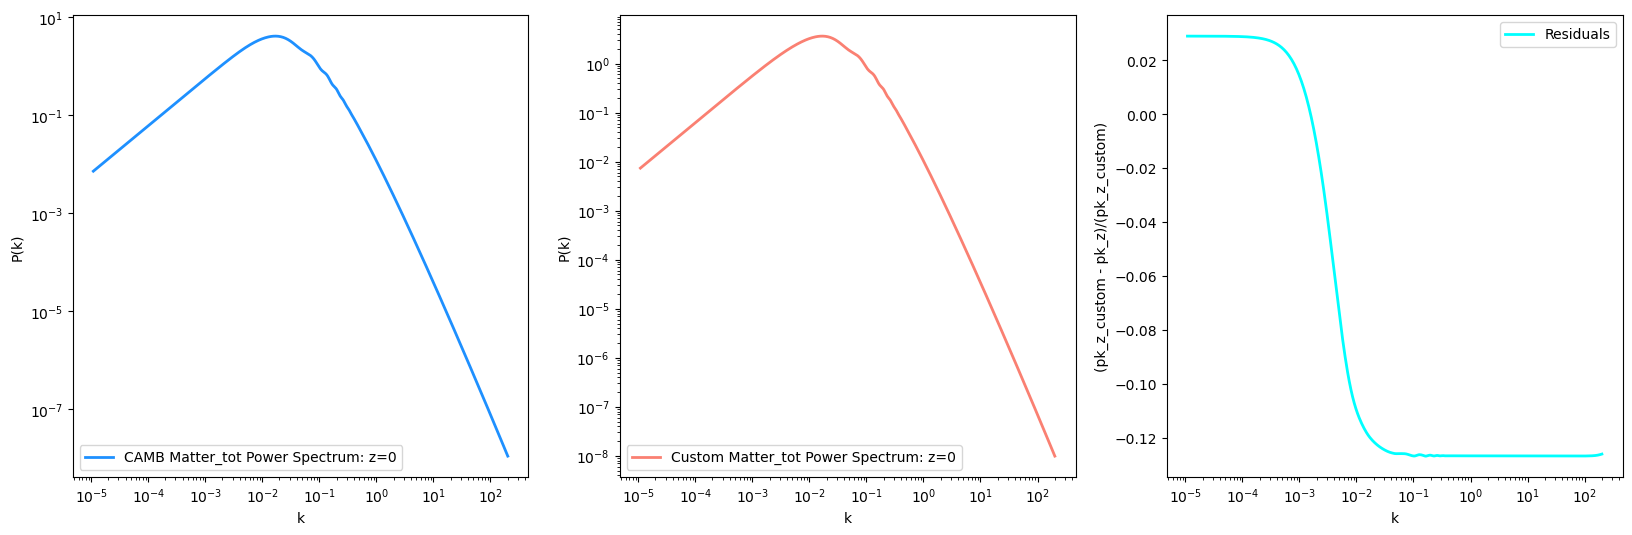

In [26]:
# CAMB pk
k_arr_pk, pk_z = np.loadtxt('CAMB_PK_Tables_and_Transfer_function/camb_pk_000.dat', unpack=True)

# Custom pk
k_arr_custom, pk_z_custom = np.loadtxt('Custom_scale_dep/custom_pk_000.dat', unpack=True)

# Create figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

# Plot CAMB power spectrum
axs[0].plot(k_arr_pk, pk_z, c='dodgerblue', ls='-', lw=2, label='CAMB Matter_tot Power Spectrum: z=0')
axs[0].set_xlabel('k')
axs[0].set_ylabel('P(k)')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

# Plot custom scale dep power spectrum
axs[1].plot(k_arr_custom, pk_z_custom, ls='-', c='salmon', lw=2, label='Custom Matter_tot Power Spectrum: z=0')
axs[1].set_xlabel('k')
axs[1].set_ylabel('P(k)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

# Plot custom scale dep power spectrum
axs[2].plot(k_arr_custom, (pk_z_custom - pk_z)/(pk_z_custom), ls='-', c='aqua', lw=2, label='Residuals')
axs[2].set_xlabel('k')
axs[2].set_ylabel('(pk_z_custom - pk_z)/(pk_z_custom)')
axs[2].set_xscale('log')
# axs[2].set_yscale('log')
axs[2].legend()

# plt.savefig("PK_and_Transfer_Functio_z_0.png")
plt.show()